<a href="https://colab.research.google.com/github/SIVAGORAM/DEEPLEARNING/blob/main/Liver_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#9921005015-GORAM SIVA PRASAD
import numpy as np
import pandas as pd
from time import time
from IPython.display import display
from datetime import datetime

In [ ]:
liver_data = pd.read_csv('indian_liver_patient.csv')

In [ ]:
liver_data.info()
print("GORAM SIVA PRASAD-9921005015")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB
GORAM SIVA PRASAD-9921005015


Number of records: 583
Number of patients likely to have liver disease 416
Number of patients unlikely to have liver disease167
Percentage of patients likely to have liver disease71.35506003430532%


<Axes: xlabel='Dataset', ylabel='count'>

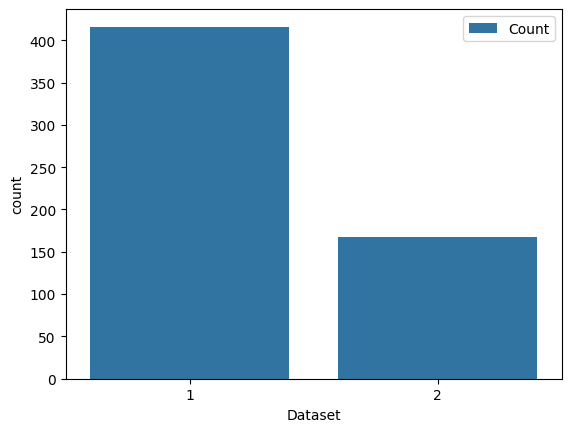

In [ ]:

import seaborn as sns
n_records = len(liver_data.index)
n_records_liv_pos = len(liver_data[liver_data['Dataset'] == 1])
n_records_liv_neg = len(liver_data[liver_data['Dataset'] == 2])
percent_liver_disease_pos = (n_records_liv_pos/n_records)*100
print("Number of records: {}".format(n_records))
print("Number of patients likely to have liver disease {}".format(n_records_liv_pos))
print("Number of patients unlikely to have liver disease{}".format(n_records_liv_neg))
print("Percentage of patients likely to have liver disease{}%".format(percent_liver_disease_pos))
sns.countplot(data=liver_data, x = 'Dataset', label='Count')



In [ ]:

liver_data_labels = liver_data['Dataset']
# Drop label feature
liver_data_features = liver_data.drop(['Dataset'], axis=1)
display(liver_data_features[liver_data_features['Albumin_and_Globulin_Ratio'].isnull()])

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN


In [ ]:
liver_data_features.Albumin_and_Globulin_Ratio.fillna(liver_data_features['Albumin_and_Globulin_Ratio'].median(), inplace=True)
albumin_globulin_missing_indices = [209, 241, 253, 312]
liver_data_features.loc[albumin_globulin_missing_indices].head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,0.93
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,0.93
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,0.93
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,0.93


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Total_Bilirubin'}>,
        <Axes: title={'center': 'Direct_Bilirubin'}>],
       [<Axes: title={'center': 'Alkaline_Phosphotase'}>,
        <Axes: title={'center': 'Alamine_Aminotransferase'}>,
        <Axes: title={'center': 'Aspartate_Aminotransferase'}>],
       [<Axes: title={'center': 'Total_Protiens'}>,
        <Axes: title={'center': 'Albumin'}>,
        <Axes: title={'center': 'Albumin_and_Globulin_Ratio'}>]],
      dtype=object)

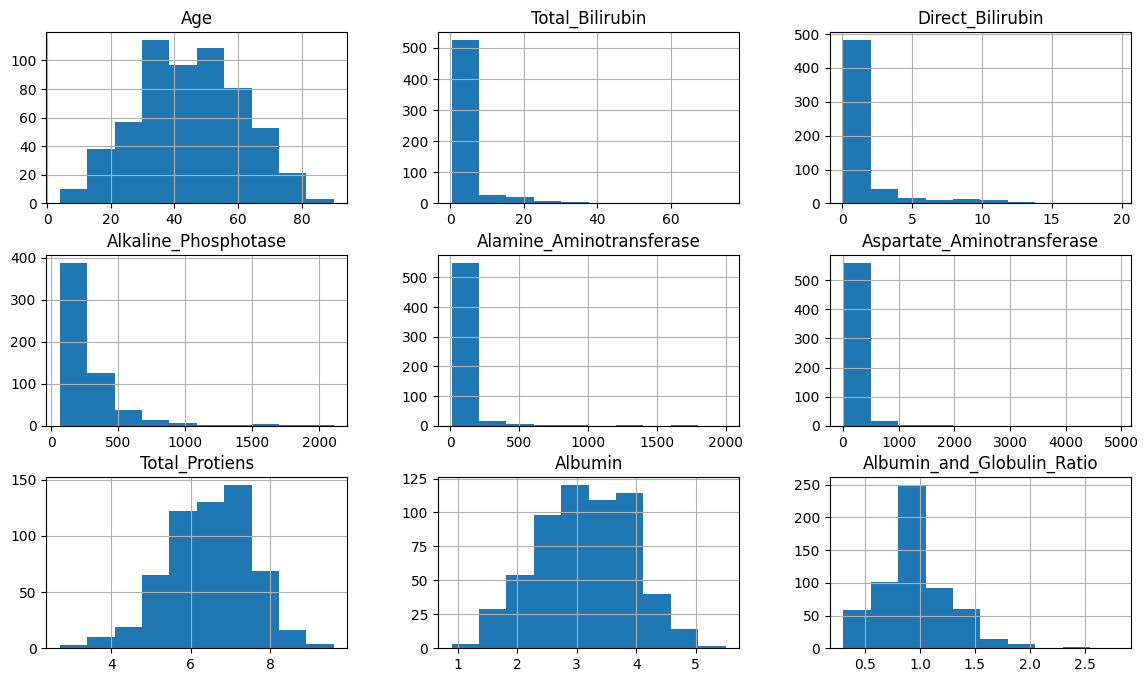

In [ ]:
liver_data_features.hist(figsize=(14,8))

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Total_Bilirubin'}>,
        <Axes: title={'center': 'Direct_Bilirubin'}>],
       [<Axes: title={'center': 'Alkaline_Phosphotase'}>,
        <Axes: title={'center': 'Alamine_Aminotransferase'}>,
        <Axes: title={'center': 'Aspartate_Aminotransferase'}>],
       [<Axes: title={'center': 'Total_Protiens'}>,
        <Axes: title={'center': 'Albumin'}>,
        <Axes: title={'center': 'Albumin_and_Globulin_Ratio'}>]],
      dtype=object)

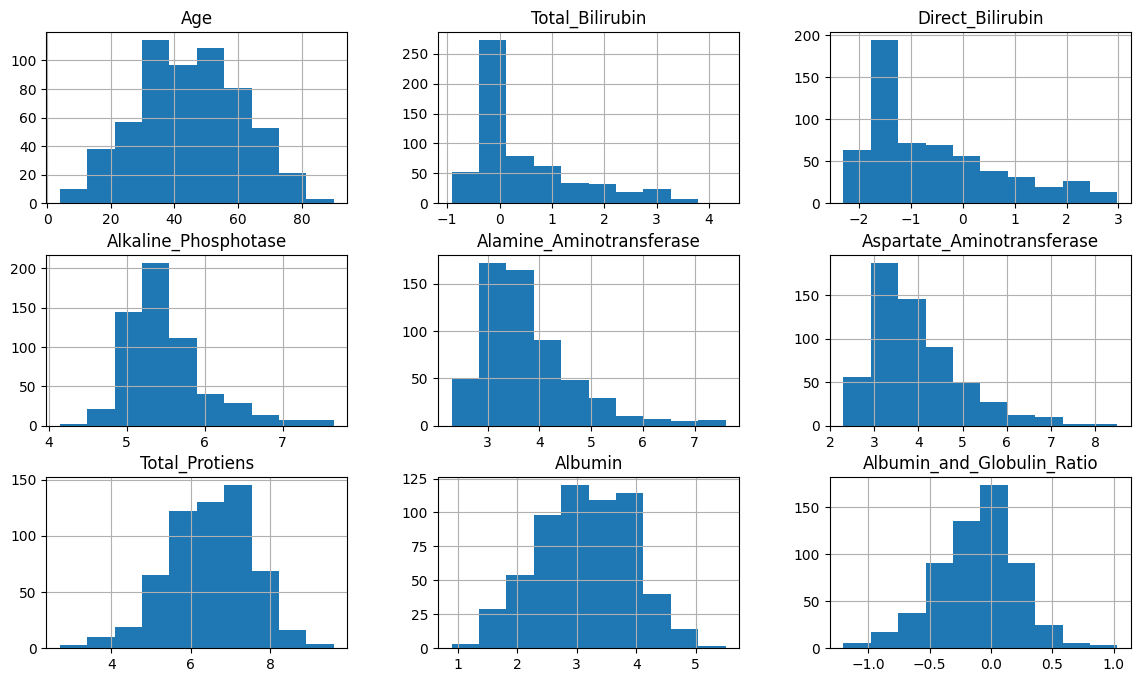

In [ ]:
skewed = ['Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
'Albumin_and_Globulin_Ratio']
liver_data_features_log_transformed = pd.DataFrame(data = liver_data_features)
liver_data_features_log_transformed[skewed] =liver_data_features[skewed].apply(lambda x: np.log(x))
liver_data_features_log_transformed.hist(figsize=(14,8))

In [ ]:
liver_data_features_log_transformed.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,0.463421,-0.650373,5.493417,3.751829,3.956771,6.483190,3.141852,-0.111273
std,16.189833,1.018527,1.326394,0.528128,0.900236,0.997381,1.085451,0.795519,0.344530
min,4.000000,-0.916291,-2.302585,4.143135,2.302585,2.302585,2.700000,0.900000,-1.203973
25%,33.000000,-0.223144,-1.609438,5.167635,3.135494,3.218876,5.800000,2.600000,-0.356675
50%,45.000000,0.000000,-1.203973,5.337538,3.555348,3.737670,6.600000,3.100000,-0.072571
75%,58.000000,0.955511,0.262364,5.697093,4.102609,4.465908,7.200000,3.800000,0.095310
max,90.000000,4.317488,2.980619,7.654443,7.600902,8.502891,9.600000,5.500000,1.029619


In [ ]:
liver_data_features_final = pd.get_dummies(liver_data_features_log_transformed, columns=['Gender'])
liver_data_features_final.head(n=3)


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
0,65,-0.356675,-2.302585,5.231109,2.772589,2.890372,6.8,3.3,-0.105361,1,0
1,62,2.388763,1.704748,6.549651,4.158883,4.605170,7.5,3.2,-0.301105,0,1
2,62,1.987874,1.410987,6.194405,4.094345,4.219508,7.0,3.3,-0.116534,0,1


In [ ]:
true_pos = n_records_liv_pos
false_pos = liver_data_labels.count() - true_pos
true_neg = 0
false_neg = 0
print('true positives: {} | true negatives: {}'.format(true_pos,false_pos))


true positives: 416 | true negatives: 167


In [ ]:
accuracy = true_pos/liver_data_labels.count()
recall = true_pos/(true_pos + false_neg)
precision = true_pos/(true_pos + false_pos)
print('accuracy: {} | precision: {} | recall: {}'.format(accuracy, precision, recall))

accuracy: 0.7135506003430532 | precision: 0.7135506003430532 | recall: 1.0


In [ ]:
beta = 2
fscore = (1 + beta * beta) * (precision * recall) / (beta * beta * precision + recall)


In [ ]:
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy,
fscore))

Naive Predictor: [Accuracy score: 0.7136, F-score: 0.9257]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(liver_data_features_final,
                             liver_data_labels,
                             test_size = 0.2,
                             random_state = 24,
                             shuffle = True)

In [ ]:
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 466 samples.
Testing set has 117 samples.


In [ ]:
from sklearn.metrics import fbeta_score,accuracy_score
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test):
  '''
  inputs:
  - learner: the learning algorithm to be trained and predicted on
  - sample_size: the size of samples (number) to be drawn from training set
  - X_train: features training set
  - y_train: income training set
  - X_test: features testing set
  - y_test: income testing set
  '''
  results = {}
  start = time() # Get start time
  learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
  end = time()
  results['train_time'] = end-start
  start = time() # Get start time
  predictions_test = learner.predict(X_test)
  predictions_train = learner.predict(X_train[:150])
  end = time()
  results['pred_time'] = end-start
  results['acc_train'] = accuracy_score(y_train[:150], predictions_train)
  results['acc_test'] = accuracy_score(y_test, predictions_test)
  results['f_train'] = fbeta_score(y_train[:150], predictions_train, beta=2)
  results['f_test'] = fbeta_score(y_test, predictions_test, beta=2)
  print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
  print(results)
  return results

In [ ]:
  from sklearn.linear_model import LogisticRegression
  clf_bench = LogisticRegression(random_state=24)
  sample_size = X_train.shape[0]
  results_bench = {}
  results_bench = train_predict(clf_bench, sample_size, X_train, y_train, X_test, y_test)
  print('Accuracy score on training set: {} | Accuracy score on testing set: {} | F-scoreon training set: {} | F-score on test set: {}'.format(results_bench['acc_train'],results_bench['acc_test'], results_bench['f_train'], results_bench['f_test']))


LogisticRegression trained on 466 samples.
{'train_time': 0.0390775203704834, 'pred_time': 0.004164934158325195, 'acc_train': 0.7333333333333333, 'acc_test': 0.6752136752136753, 'f_train': 0.9066427289048474, 'f_test': 0.8548009367681499}
Accuracy score on training set: 0.7333333333333333 | Accuracy score on testing set: 0.6752136752136753 | F-scoreon training set: 0.9066427289048474 | F-score on test set: 0.8548009367681499


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
clf_A = SVC(random_state=24)
clf_B = KNeighborsClassifier()
clf_C = RandomForestClassifier(random_state=24)
clf_all = [clf_A, clf_B, clf_C]
clf_all = [clf_A, clf_B, clf_C]
#Calculate the number of samples for 20%, 50%, and 100% of the training data
samples_100 = len(y_train)
samples_50 = int(samples_100 * .5)
samples_20 = int(samples_100 * .2)
# # Collect results on the learners
results = {}
for clf in clf_all:
 clf_name = clf.__class__.__name__
 results[clf_name] = {}
 for i, samples in enumerate([samples_20, samples_50, samples_100]):
   results[clf_name][i] = \
   train_predict(clf, samples, X_train, y_train, X_test, y_test)

SVC trained on 93 samples.
{'train_time': 0.0068247318267822266, 'pred_time': 0.0069882869720458984, 'acc_train': 0.7, 'acc_test': 0.6923076923076923, 'f_train': 0.9210526315789475, 'f_test': 0.9183673469387755}
SVC trained on 233 samples.
{'train_time': 0.00857686996459961, 'pred_time': 0.009864568710327148, 'acc_train': 0.7, 'acc_test': 0.6923076923076923, 'f_train': 0.9210526315789475, 'f_test': 0.9183673469387755}
SVC trained on 466 samples.
{'train_time': 0.024892807006835938, 'pred_time': 0.01485896110534668, 'acc_train': 0.7, 'acc_test': 0.6923076923076923, 'f_train': 0.9210526315789475, 'f_test': 0.9183673469387755}
KNeighborsClassifier trained on 93 samples.
{'train_time': 0.004095554351806641, 'pred_time': 0.03403449058532715, 'acc_train': 0.7333333333333333, 'acc_test': 0.6581196581196581, 'f_train': 0.8715596330275229, 'f_test': 0.819477434679335}
KNeighborsClassifier trained on 233 samples.
{'train_time': 0.00808095932006836, 'pred_time': 0.032657623291015625, 'acc_train':

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
clf_D = LinearSVC(random_state=24)
clf_E = DecisionTreeClassifier(random_state=24)
clf_F = AdaBoostClassifier(random_state=24)
clf_more = [clf_D, clf_E, clf_F]
more_results = {}
for clf in clf_more:
  clf_name = clf.__class__.__name__
  more_results[clf_name] = {}
  for i, samples in enumerate([samples_20, samples_50, samples_100]):
    more_results[clf_name][i] = \
    train_predict(clf, samples, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC trained on 93 samples.
{'train_time': 0.011877059936523438, 'pred_time': 0.004006385803222656, 'acc_train': 0.72, 'acc_test': 0.6923076923076923, 'f_train': 0.9203539823008849, 'f_test': 0.9111617312072893}
LinearSVC trained on 233 samples.
{'train_time': 0.018407106399536133, 'pred_time': 0.004276275634765625, 'acc_train': 0.7133333333333334, 'acc_test': 0.6666666666666666, 'f_train': 0.9131205673758864, 'f_test': 0.8755760368663594}
LinearSVC trained on 466 samples.
{'train_time': 0.02715587615966797, 'pred_time': 0.003844022750854492, 'acc_train': 0.7, 'acc_test': 0.6837606837606838, 'f_train': 0.9098939929328621, 'f_test': 0.9018264840182649}
DecisionTreeClassifier trained on 93 samples.
{'train_time': 0.004561424255371094, 'pred_time': 0.0030803680419921875, 'acc_train': 0.8333333333333334, 'acc_test': 0.5897435897435898, 'f_train': 0.9022556390977444, 'f_test': 0.7299270072992701}
DecisionTreeClassifier trained on 233 samples.
{'train_time': 0.006800413131713867, 'pred_

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,fbeta_score
from datetime import datetime
clf = SVC(random_state=24)
kernel_options = ['linear', 'poly', 'rbf']
c_param_options = [0.01, 0.1, 1, 10]
gamma_param_options = [0.001, 0.01, 0.1, 1]
parameters = {'C': c_param_options, 'kernel': kernel_options, 'gamma':
gamma_param_options}
scorer = make_scorer(fbeta_score, beta=2)
grid_obj = GridSearchCV(estimator=clf, param_grid=parameters,
scoring=scorer, n_jobs=-1, verbose=1, cv=5)
grid_fit = grid_obj.fit(X_train, y_train)
# Get the estimator
best_clf = grid_fit.best_estimator_
# print(best_clf)
# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)
# # Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test,predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta =2)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test,best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test,best_predictions, beta = 2)))
best_params = grid_fit.best_params_
best_score = grid_fit.best_score_
cv_results = grid_fit.cv_results_
print("Best parameters: {}".format(best_params))
print("Best score: {}".format(best_score))
print("CV results: {}".format(cv_results))
print(datetime.now())

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
correlations = liver_data_features.corr()
plt.figure(figsize=(10, 10))
g = sns.heatmap(correlations, cbar = True, square = True, annot=True, fmt= '.2f',annot_kws={'size': 10})



In [ ]:
sns.jointplot(x="Total_Bilirubin",y= "Direct_Bilirubin", data=liver_data,kind="reg")


In [ ]:

sns.jointplot(x="Alamine_Aminotransferase", y="Aspartate_Aminotransferase", data=liver_data, kind="reg")


In [ ]:
sns.jointplot(x="Total_Protiens",y= "Albumin", data=liver_data, kind="reg")

In [ ]:
sns.jointplot(x="Albumin", y="Albumin_and_Globulin_Ratio", data=liver_data, kind="reg")